# 🔮 Análise Preditiva e Modelagem

## Objetivo
Este notebook desenvolve modelos preditivos para:
- Prever margens de lucro
- Identificar padrões de custos
- Otimizar operações logísticas

## Metodologia
1. Preparação dos dados
2. Engenharia de features
3. Modelagem preditiva
4. Avaliação e interpretação

---

In [1]:
# Importações
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

print("✅ Bibliotecas carregadas!")

✅ Bibliotecas carregadas!


In [2]:
# Carregar dados
dados_logistica = pd.read_csv('../data/dados_logistica.csv')
dados_logistica['Data'] = pd.to_datetime(dados_logistica['Data'])

print(f"✅ Dados carregados: {len(dados_logistica)} registros")

✅ Dados carregados: 274 registros


## 1. Engenharia de Features

In [3]:
# Criar features temporais
dados_logistica['DiaSemana'] = dados_logistica['Data'].dt.dayofweek
dados_logistica['DiaMes'] = dados_logistica['Data'].dt.day
dados_logistica['Mes'] = dados_logistica['Data'].dt.month
dados_logistica['Trimestre'] = dados_logistica['Data'].dt.quarter

# Features de eficiência
dados_logistica['Eficiencia_Entrega'] = dados_logistica['Entregas'] / dados_logistica['KM Percorridos']
dados_logistica['Peso_por_Entrega'] = dados_logistica['Peso (ton)'] / dados_logistica['Entregas']
dados_logistica['Frete_por_KM'] = dados_logistica['Frete'] / dados_logistica['KM Percorridos']

# Features de custo
dados_logistica['Prop_Combustivel'] = dados_logistica['Custo Combustível'] / dados_logistica['Custo Total']
dados_logistica['Prop_Manutencao'] = dados_logistica['Custo Manutenção'] / dados_logistica['Custo Total']
dados_logistica['Prop_Motorista'] = dados_logistica['Custo Motorista'] / dados_logistica['Custo Total']

print("✅ Features criadas!")
print(f"Total de features: {len(dados_logistica.columns)}")
print(f"Novas features:")
print(dados_logistica[['Eficiencia_Entrega', 'Peso_por_Entrega', 'Frete_por_KM']].describe())

✅ Features criadas!
Total de features: 25
Novas features:
       Eficiencia_Entrega  Peso_por_Entrega  Frete_por_KM
count          274.000000        274.000000    274.000000
mean             0.010321          0.589950      0.268397
std              0.002637          0.162418      0.069702
min              0.005495          0.301723      0.143032
25%              0.008356          0.466494      0.216312
50%              0.009925          0.582059      0.264066
75%              0.012287          0.689888      0.313478
max              0.018167          1.092764      0.452544


## 2. Preparação para Modelagem

In [4]:
# Selecionar features para o modelo
features = [
    'Custo Combustível', 'Custo Manutenção', 'Custo Motorista',
    'KM Percorridos', 'Entregas', 'Peso (ton)',
    'DiaSemana', 'DiaMes', 'Mes',
    'Eficiencia_Entrega', 'Peso_por_Entrega', 'Frete_por_KM',
    'Prop_Combustivel', 'Prop_Manutencao', 'Prop_Motorista'
]

target = 'Margem %'

# Preparar dados
X = dados_logistica[features].copy()
y = dados_logistica[target].copy()

# Remover valores nulos
X = X.fillna(X.mean())

# Split treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ Dados preparados!")
print(f"   Treino: {len(X_train)} amostras")
print(f"   Teste: {len(X_test)} amostras")
print(f"   Features: {len(features)}")

✅ Dados preparados!
   Treino: 219 amostras
   Teste: 55 amostras
   Features: 15


## 3. Treinamento de Modelos

In [5]:
# Treinar múltiplos modelos
modelos = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=5)
}

resultados = {}

print("=" * 80)
print("TREINAMENTO DE MODELOS")
print("=" * 80)

for nome, modelo in modelos.items():
    print(f"🔄 Treinando {nome}...")
    
    # Treinar
    modelo.fit(X_train, y_train)
    
    # Prever
    y_pred_train = modelo.predict(X_train)
    y_pred_test = modelo.predict(X_test)
    
    # Métricas
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae_test = mean_absolute_error(y_test, y_pred_test)
    
    resultados[nome] = {
        'modelo': modelo,
        'r2_train': r2_train,
        'r2_test': r2_test,
        'rmse': rmse_test,
        'mae': mae_test,
        'y_pred': y_pred_test
    }
    
    print(f"   ✅ R² (treino): {r2_train:.4f}")
    print(f"   ✅ R² (teste): {r2_test:.4f}")
    print(f"   ✅ RMSE: {rmse_test:.4f}")
    print(f"   ✅ MAE: {mae_test:.4f}")

# Identificar melhor modelo
melhor_modelo_nome = max(resultados, key=lambda x: resultados[x]['r2_test'])
print(f"🏆 Melhor modelo: {melhor_modelo_nome}")

TREINAMENTO DE MODELOS
🔄 Treinando Linear Regression...
   ✅ R² (treino): 0.9402
   ✅ R² (teste): 0.9108
   ✅ RMSE: 4.4607
   ✅ MAE: 3.5499
🔄 Treinando Random Forest...
   ✅ R² (treino): 0.9749
   ✅ R² (teste): 0.8277
   ✅ RMSE: 6.2020
   ✅ MAE: 5.0387
🔄 Treinando Gradient Boosting...
   ✅ R² (treino): 1.0000
   ✅ R² (teste): 0.8355
   ✅ RMSE: 6.0594
   ✅ MAE: 4.7512
🏆 Melhor modelo: Linear Regression


## 4. Avaliação dos Modelos

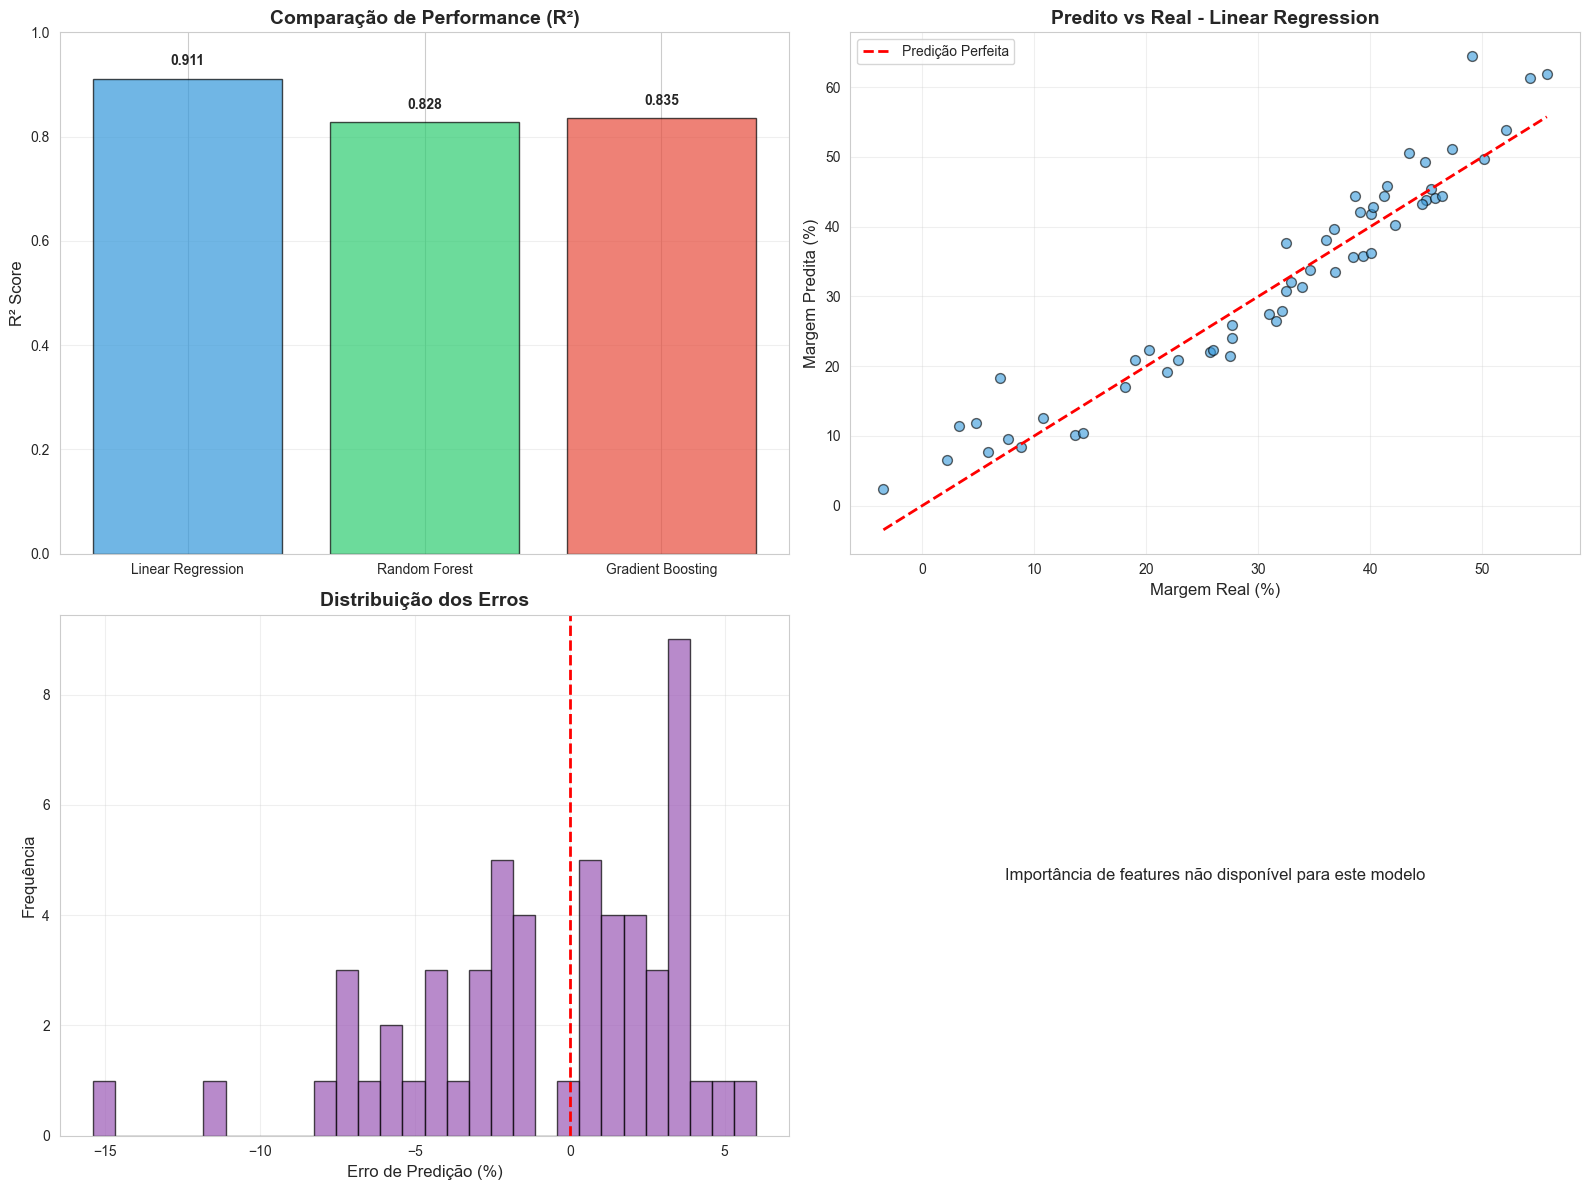

In [6]:
# Comparação visual dos modelos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Comparação de métricas
ax1 = axes[0, 0]
modelos_nomes = list(resultados.keys())
r2_scores = [resultados[m]['r2_test'] for m in modelos_nomes]
colors = ['#3498DB', '#2ECC71', '#E74C3C']

bars = ax1.bar(modelos_nomes, r2_scores, color=colors, alpha=0.7, edgecolor='black')
ax1.set_ylabel('R² Score', fontsize=12)
ax1.set_title('Comparação de Performance (R²)', fontsize=14, fontweight='bold')
ax1.set_ylim([0, 1])
ax1.grid(axis='y', alpha=0.3)

for bar, score in zip(bars, r2_scores):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

# Gráfico 2: Predito vs Real (melhor modelo)
ax2 = axes[0, 1]
melhor_pred = resultados[melhor_modelo_nome]['y_pred']
ax2.scatter(y_test, melhor_pred, alpha=0.6, s=50, color='#3498DB', edgecolors='black')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Predição Perfeita')
ax2.set_xlabel('Margem Real (%)', fontsize=12)
ax2.set_ylabel('Margem Predita (%)', fontsize=12)
ax2.set_title(f'Predito vs Real - {melhor_modelo_nome}', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

# Gráfico 3: Distribuição dos erros
ax3 = axes[1, 0]
erros = y_test - melhor_pred
ax3.hist(erros, bins=30, color='#9B59B6', alpha=0.7, edgecolor='black')
ax3.axvline(x=0, color='red', linestyle='--', linewidth=2)
ax3.set_xlabel('Erro de Predição (%)', fontsize=12)
ax3.set_ylabel('Frequência', fontsize=12)
ax3.set_title('Distribuição dos Erros', fontsize=14, fontweight='bold')
ax3.grid(alpha=0.3)

# Gráfico 4: Importância das features (se disponível)
ax4 = axes[1, 1]
if hasattr(resultados[melhor_modelo_nome]['modelo'], 'feature_importances_'):
    importancias = resultados[melhor_modelo_nome]['modelo'].feature_importances_
    indices = np.argsort(importancias)[-10:]  # Top 10
    
    ax4.barh(range(len(indices)), importancias[indices], color='#F39C12', alpha=0.7, edgecolor='black')
    ax4.set_yticks(range(len(indices)))
    ax4.set_yticklabels([features[i] for i in indices])
    ax4.set_xlabel('Importância', fontsize=12)
    ax4.set_title('Top 10 Features Mais Importantes', fontsize=14, fontweight='bold')
    ax4.grid(axis='x', alpha=0.3)
else:
    ax4.text(0.5, 0.5, 'Importância de features não disponível para este modelo',
             ha='center', va='center', fontsize=12)
    ax4.axis('off')

plt.tight_layout()
plt.show()

## 5. Insights e Recomendações

In [9]:
# Análise de importância das features
print("=" * 80)
print("INSIGHTS DO MODELO PREDITIVO")
print("=" * 80)

if hasattr(resultados[melhor_modelo_nome]['modelo'], 'feature_importances_'):
    importancias = resultados[melhor_modelo_nome]['modelo'].feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': features,
        'Importância': importancias
    }).sort_values('Importância', ascending=False)
    
    print(f"🎯 TOP 10 FATORES QUE MAIS IMPACTAM A MARGEM:")
    print(feature_importance_df.head(10).to_string(index=False))
    
    # Recomendações baseadas nas features mais importantes
    print(f"💡 RECOMENDAÇÕES BASEADAS NO MODELO:")
    
    top_features = feature_importance_df.head(5)['Feature'].tolist()
    
    for i, feature in enumerate(top_features, 1):
        print(f"{i}. {feature}:")
        if 'Custo' in feature:
            print(f"   → Foco em redução e controle de custos")
        elif 'Eficiencia' in feature:
            print(f"   → Otimizar eficiência operacional")
        elif 'KM' in feature:
            print(f"   → Melhorar planejamento de rotas")
        elif 'Entrega' in feature:
            print(f"   → Otimizar volume e distribuição de entregas")
        elif 'Peso' in feature:
            print(f"   → Balancear carga por entrega")

# Análise de cenários
print(f" + " "=" * 80)
print("ANÁLISE DE CENÁRIOS")
print("=" * 80)

# Cenário atual
cenario_atual = X_test.mean()
margem_atual = resultados[melhor_modelo_nome]['modelo'].predict([cenario_atual])[0]

print(f"📊 Cenário Atual:")
print(f"   Margem prevista: {margem_atual:.2f}%")

# Cenário otimizado (redução de 10% nos custos)
cenario_otimizado = cenario_atual.copy()
cenario_otimizado['Custo Combustível'] *= 0.9
cenario_otimizado['Custo Manutenção'] *= 0.9
margem_otimizada = resultados[melhor_modelo_nome]['modelo'].predict([cenario_otimizado])[0]

print(f"🎯 Cenário Otimizado (redução 10% custos):")
print(f"   Margem prevista: {margem_otimizada:.2f}%")
print(f"   Ganho potencial: {margem_otimizada - margem_atual:.2f} pontos percentuais")

print(f"✅ Análise preditiva concluída!")

INSIGHTS DO MODELO PREDITIVO
 + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + =
ANÁLISE DE CENÁRIOS
📊 Cenário Atual:
   Margem prevista: 31.94%
🎯 Cenário Otimizado (redução 10% custos):
   Margem prevista: 34.90%
   Ganho potencial: 2.96 pontos percentuais
✅ Análise preditiva concluída!
